# Iris Plants Database

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('iris.data' , sep = ',' , names = ['sepal_length'  , 'sepal_width' ,'petal_length' ,'petal_width' ,'class_type'])

In [13]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
data = data.sample(frac = 1).reset_index(drop = True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class_type
0,6.2,2.8,4.8,1.8,Iris-virginica
1,5.6,2.7,4.2,1.3,Iris-versicolor
2,4.8,3.0,1.4,0.3,Iris-setosa
3,5.6,2.5,3.9,1.1,Iris-versicolor
4,6.3,2.9,5.6,1.8,Iris-virginica


In [15]:
# checking the missing values in the dataframe 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class_type      0
dtype: int64

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


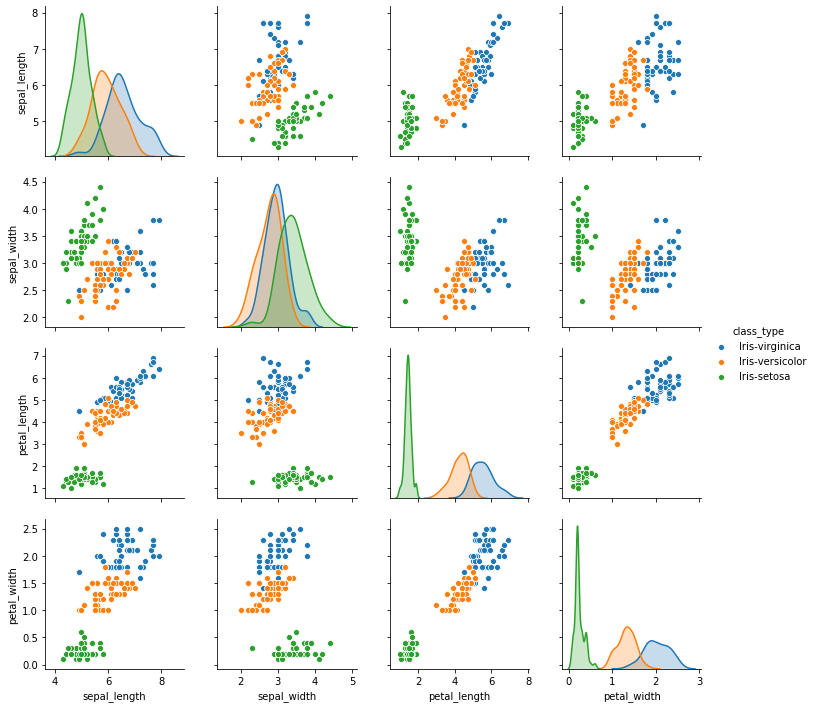

In [16]:
desc = data.describe()
print(desc)

# plotting the columns pairwise
sns.pairplot(data , hue = 'class_type')


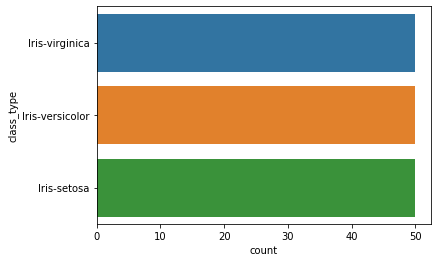

In [17]:
sns.countplot(y = 'class_type' , data = data)

the data is evenly distributed between the categories and as the data in iris.data file is grouped by class_type of the flower. its necessary to shuffle them , hence sample function is used and setting 'drop' to True prevents a new column to be created which contains the old index values.

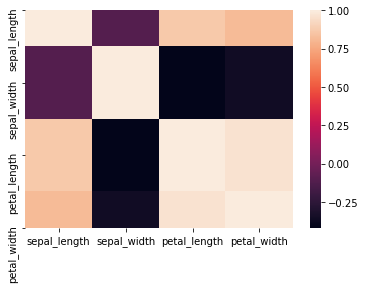

In [18]:
# correlation between the column pairs 
acc = data.corr(method = 'pearson')
sns.heatmap(acc )

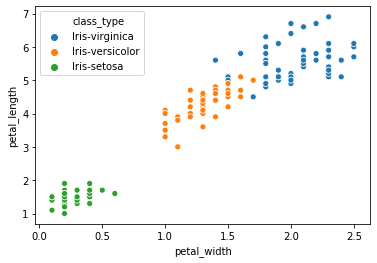

In [19]:
sns.scatterplot( x = 'petal_width' ,  y = 'petal_length' ,hue = 'class_type' ,  data = data)

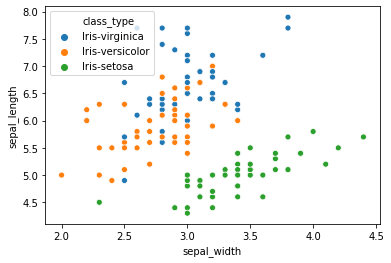

In [20]:
sns.scatterplot( x = 'sepal_width' ,  y = 'sepal_length' ,hue = 'class_type' ,  data = data)

In [21]:
# defining the target variable and local variable 
y = data.loc[: , ['class_type']].values
x= data.loc[: , ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

In [125]:
#splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3)

In [126]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
y_test = enc.transform(y_test)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Applying different models to perform Classification
******************************************************

In [128]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [129]:
#   DECISION TREE CLASSIFIER
model1 = DecisionTreeClassifier()

In [130]:
model1.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
cm1 = confusion_matrix(y_test , model1.predict(x_test))
print(cm1)

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]


In [132]:
#SVC
model2 = SVC()
model2.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [133]:
cm2 = confusion_matrix(y_test , model2.predict(x_test))
print(cm2)

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [134]:
#    HYPERPARAMETER TUNING

In [135]:
#applying the grid search 
from sklearn.model_selection import GridSearchCV
params = [{'max_depth': [5, 10 , 20 , 30] , 'criterion' : ['entropy'] , 'random_state' : [42]},
           {'splitter': ['best'] , 'random_state' : [42] ,'max_depth': [4, 5, 6 , 3, 2] ,'criterion' : ['gini']}]
grid_search = GridSearchCV(estimator = model1, 
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 10, 20, 30], 'criterion': ['entropy'], 'random_state': [42]}, {'splitter': ['best'], 'random_state': [42], 'max_depth': [4, 5, 6, 3, 2], 'criterion': ['gini']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9333333333333333
{'criterion': 'gini', 'max_depth': 4, 'random_state': 42, 'splitter': 'best'}


In [137]:
classifier = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5 , random_state = 42)

In [138]:
classifier.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [139]:
y_pr1 = classifier.predict(x_test)

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pr1)
cm

array([[14,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 15]], dtype=int64)

In [141]:
from sklearn import metrics
print(metrics.accuracy_score(y_test , y_pr1))

0.9333333333333333


In [142]:
params = [{'kernel': ['linear' , 'rbf'] , 'C' : [1e10 , 1e9 , 1e6 , 1e8]}]
grid_srch = GridSearchCV(estimator = model2, 
                           param_grid = params,
                           cv = 10,
                           n_jobs = -1)
grid_srch.fit(x_train , y_train)

C:\Users\Dhruv Sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [10000000000.0, 1000000000.0, 1000000.0, 100000000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [143]:
print(grid_srch.best_score_)
print(grid_srch.best_params_)

0.9428571428571428
{'C': 10000000000.0, 'kernel': 'linear'}


In [144]:
classifier2 = SVC(kernel = 'linear' , C = 1e10)
classifier2.fit(x_train , y_train)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [145]:
y_pr2 = classifier2.predict(x_test)

In [146]:
cm_ = confusion_matrix(y_test , y_pr2)
print(cm_)

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]


In [147]:
from sklearn import metrics
print(metrics.accuracy_score(y_test , y_pr2))

0.9555555555555556


### Conclusion